In [1]:
from cribbage import *

In [2]:
import numpy as np

In [3]:
def generate_4scores():
    while True:
        h = make_random_hand()
        yield score_hand(h)

In [4]:
import itertools
samples = np.array(list(itertools.islice(generate_4scores(), 100000)))

In [5]:
%matplotlib inline

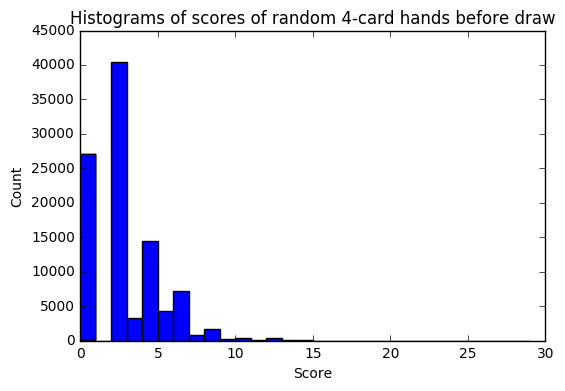

In [6]:
from matplotlib import pyplot as plt
plt.hist(samples, 29, (0,29))
plt.title('Histograms of scores of random 4-card hands before draw')
plt.xlabel('Score')
plt.ylabel('Count')

In [7]:
from collections import Counter
Counter(samples)

Counter({0: 27029,
         2: 40388,
         3: 3220,
         4: 14427,
         5: 4257,
         6: 7140,
         7: 855,
         8: 1696,
         9: 209,
         10: 315,
         11: 15,
         12: 412,
         13: 3,
         14: 34})

Counter({0: 39002,
         1: 3951,
         2: 108061,
         3: 19226,
         4: 109944,
         5: 26809,
         6: 69108,
         7: 28948,
         8: 43613,
         9: 13899,
         10: 15124,
         11: 2001,
         12: 12355,
         13: 787,
         14: 3596,
         15: 336,
         16: 2168,
         17: 427,
         18: 109,
         20: 301,
         21: 88,
         22: 18,
         23: 8,
         24: 121})

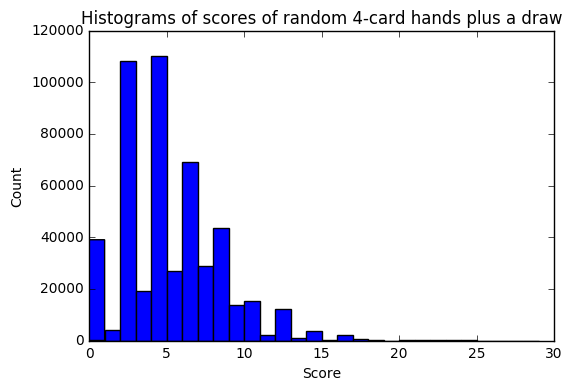

In [8]:
def generate_5scores():
    while True:
        h, d = make_random_hand_and_draw()
        yield score_hand(h, d)
samples5 = np.array(list(itertools.islice(generate_5scores(), 500000)))
plt.hist(samples5, 29, (0,29))
plt.title('Histograms of scores of random 4-card hands plus a draw')
plt.xlabel('Score')
plt.ylabel('Count')
Counter(samples5)

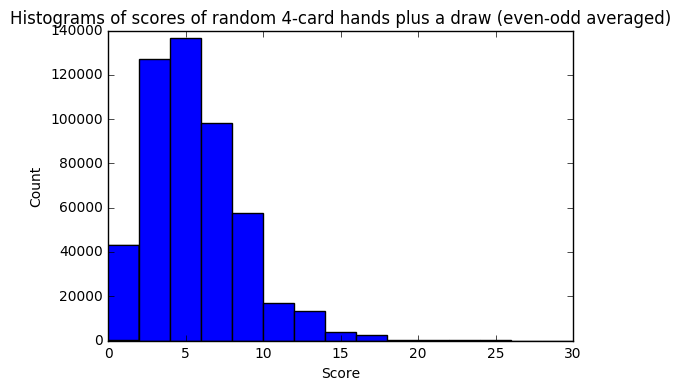

In [9]:
plt.hist(samples5, 15, (0,30))
plt.title('Histograms of scores of random 4-card hands plus a draw (even-odd averaged)')
plt.xlabel('Score')
plt.ylabel('Count')

In [10]:
%timeit h,d = make_random_hand_and_draw() ; score_hand(h,d)

10000 loops, best of 3: 57 µs per loop


In [11]:
import c_cribbage_score
%timeit h,d = make_random_hand_and_draw() ; c_cribbage_score.score_hand(h,d)

The slowest run took 4.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.3 µs per loop


In [12]:
for x in range(1000000):
    h,d = make_random_hand_and_draw()
    if score_hand(h,d) != c_cribbage_score.score_hand(h,d):
        print 'hand', ', '.join([card_tostring(v) for v in h])
        print 'draw', card_tostring(d)
        print 'C code score:', c_cribbage_score.score_hand(h,d)
        score_hand(h, d, verbose=True)

In [13]:
h,d = make_random_hand_and_draw()
%timeit score_hand(h,d)

10000 loops, best of 3: 40 µs per loop


In [14]:
%timeit c_cribbage_score.score_hand(h,d)

The slowest run took 16.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 301 ns per loop


In [15]:
%timeit h,d = make_random_hand_and_draw()

The slowest run took 4.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.77 µs per loop


In [27]:
import cribbage
reload(cribbage)
reload(c_cribbage_score)

<module 'c_cribbage_score' from 'c_cribbage_score.so'>